In [1]:
#--importing nessesary libraries --#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor


In [2]:
df = pd.read_csv('/Users/michaelsegaline/Desktop/Spokane roofing permits /Spokane_PRR_Roof_Permits_2005-2025.csv')

In [3]:
df.head()

,RECORD_ID,RECORD_NAME,ADDR_FULL_LINE#,Unnamed: 3,Unnamed: 4,RECORD_OPEN_DATE,Number of Roofing Squares
0,*0500016,TEAR OFF/REROOF - LAMB RES.,NaN,NaN,NaN,1/3/05 0:00,NaN
1,*0500028,REMODEL COMMERCIAL BUILDING,NaN,NaN,NaN,1/3/05 0:00,NaN
2,B0500022,4524 S STONE ST,4524 S STONE ST,SPOKANE,WA 00000,1/3/05 0:00,NaN
3,B0500030,435 W 27TH AVE,435 W 27TH AVE,SPOKANE,WA 00000,1/3/05 0:00,NaN
4,B0500032,902 W INDIANA AVE,902 W INDIANA AVE,SPOKANE,WA 00000,1/3/05 0:00,NaN


In [4]:
df.shape

(28407, 7)

In [7]:
# Standardize addresses
df['ADDR_FULL_LINE#'] = df['ADDR_FULL_LINE#'].str.strip().str.lower()
df2['address'] = df2['address'].str.strip().str.lower()

# Merge on the cleaned address columns
merged_df = df.merge(df2, left_on='ADDR_FULL_LINE#', right_on='address', how='inner')

# Display result
print(merged_df)

          RECORD_ID          RECORD_NAME      ADDR_FULL_LINE# Unnamed: 3  \
0          B0500022      4524 S STONE ST      4524 s stone st    SPOKANE   
1          B0500075   224 W CARLISLE AVE   224 w carlisle ave    SPOKANE   
2          B0500082  3514 S JEFFERSON DR  3514 s jefferson dr    SPOKANE   
3          B0500082  3514 S JEFFERSON DR  3514 s jefferson dr    SPOKANE   
4          B0500085   1729 W GARDNER AVE   1729 w gardner ave    SPOKANE   
...             ...                  ...                  ...        ...   
21685  B2501988RFSW                  NaN      1004 e 13th ave    SPOKANE   
21686  B2501990RFSW                  NaN  2321 s pittsburg st    SPOKANE   
21687  B2501990RFSW                  NaN  2321 s pittsburg st    SPOKANE   
21688  B2502187RFSW                  NaN      2326 e rich ave    SPOKANE   
21689  B2502187RFSW                  NaN      2326 e rich ave    SPOKANE   

      Unnamed: 4 RECORD_OPEN_DATE  Number of Roofing Squares first_name  \
0       WA 0

In [9]:
df3= merged_df

In [10]:

# Convert to datetime format
df3['RECORD_OPEN_DATE'] = pd.to_datetime(df3['RECORD_OPEN_DATE'], format='%m/%d/%y %H:%M', errors='coerce')

# Extract day, month, and year
df3['Day'] = df3['RECORD_OPEN_DATE'].dt.day
df3['Month'] = df3['RECORD_OPEN_DATE'].dt.month
df3['Year'] = df3['RECORD_OPEN_DATE'].dt.year

df3.head()

,RECORD_ID,RECORD_NAME,ADDR_FULL_LINE#,Unnamed: 3,Unnamed: 4,RECORD_OPEN_DATE,Number of Roofing Squares,first_name,middle_name,last_name,address,city,zipcode,state,phone,Day,Month,Year
0,B0500022,4524 S STONE ST,4524 s stone st,SPOKANE,WA 00000,2005-01-03,NaN,Cory,J,Howard,4524 s stone st,SPOKANE,99223,WA,5094998837,3,1,2005
1,B0500075,224 W CARLISLE AVE,224 w carlisle ave,SPOKANE,WA 00000,2005-01-04,NaN,William,M,Beyer,224 w carlisle ave,SPOKANE,99205,WA,5094999982,4,1,2005
2,B0500082,3514 S JEFFERSON DR,3514 s jefferson dr,SPOKANE,WA 00000,2005-01-04,NaN,Leslie,Carey,Cohen,3514 s jefferson dr,SPOKANE,99203,WA,5094558436,4,1,2005
3,B0500082,3514 S JEFFERSON DR,3514 s jefferson dr,SPOKANE,WA 00000,2005-01-04,NaN,Arnold,Norman,Cohen,3514 s jefferson dr,SPOKANE,99203,WA,5099936873,4,1,2005
4,B0500085,1729 W GARDNER AVE,1729 w gardner ave,SPOKANE,WA 00000,2005-01-05,NaN,Jessica,A,Albright,1729 w gardner ave,SPOKANE,99201,WA,5099394965,5,1,2005


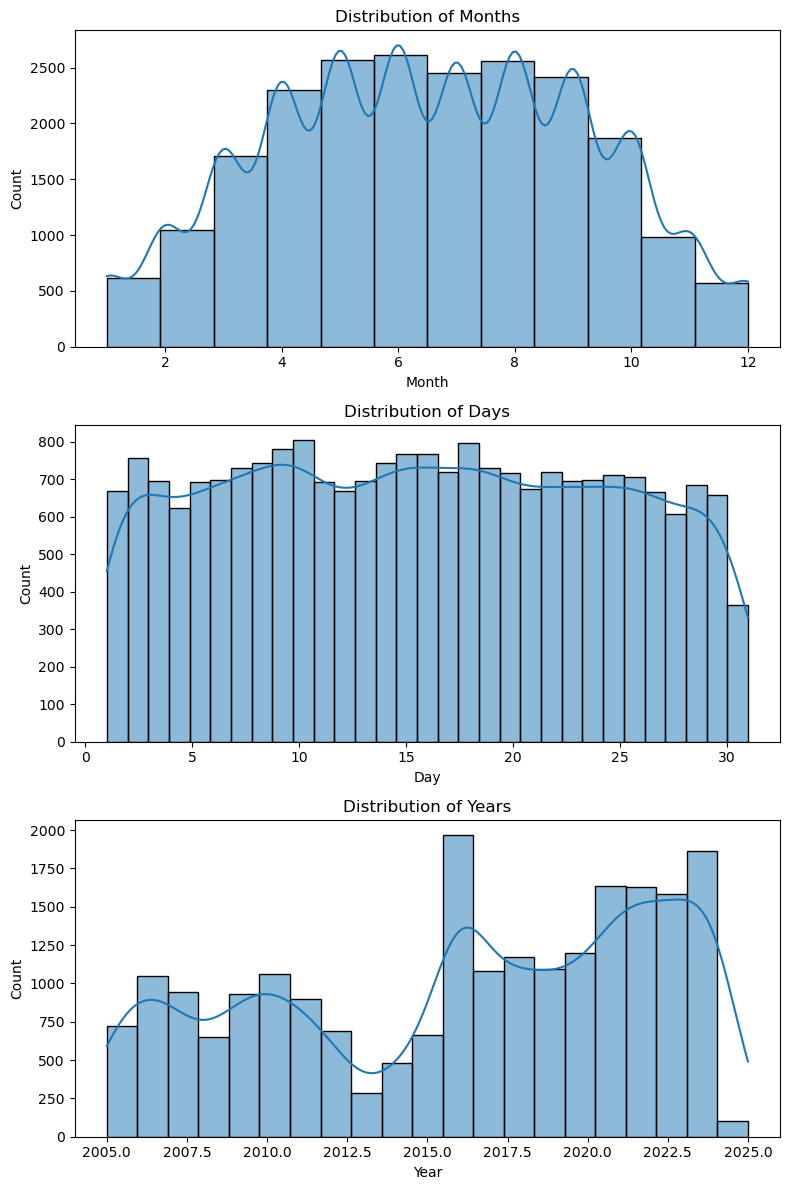

In [11]:

# Plot distributions
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

sns.histplot(df3['Month'], bins=12, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Months")

sns.histplot(df3['Day'], bins=31, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Days")

sns.histplot(df3['Year'], bins=len(df3['Year'].unique()), kde=True, ax=axes[2])
axes[2].set_title("Distribution of Years")

plt.tight_layout()
plt.show()

In [12]:
df3['Number of Roofing Squares'].mean()

23.277736461361638

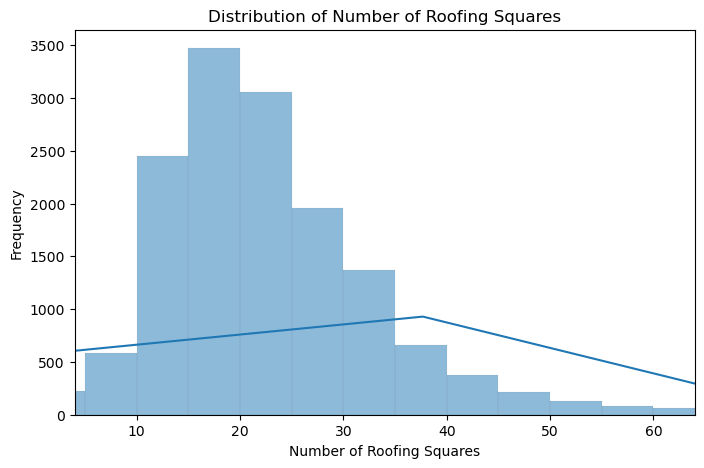

In [13]:

# Set bin width based on data range for better zoom
plt.figure(figsize=(8, 5))
sns.histplot(df3['Number of Roofing Squares'], binwidth=5, kde=True)

# Labels and title
plt.xlabel('Number of Roofing Squares')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Roofing Squares')

# Adjust x-axis range if needed (modify based on your data)
plt.xlim(df3['Number of Roofing Squares'].quantile(0.01), df3['Number of Roofing Squares'].quantile(0.99))

# Show plot
plt.show()

In [15]:
# Get value counts for 'Roofing Squares'
roofing_squares_counts = df3['Number of Roofing Squares'].value_counts()

# Get the frequency of these frequencies
unique_frequency_counts = roofing_squares_counts.value_counts()
print(unique_frequency_counts)


2      14
1      13
5       5
3       4
7       4
       ..
181     1
178     1
132     1
119     1
110     1
Name: Number of Roofing Squares, Length: 62, dtype: int64


In [16]:
day_unique_counts = df3["Day"].value_counts().value_counts()
month_unique_counts = df3["Month"].value_counts().value_counts()
year_unique_counts = df3["Year"].value_counts().value_counts()

print("Unique Day Frequencies:\n", day_unique_counts)
print("\nUnique Month Frequencies:\n", month_unique_counts)
print("\nUnique Year Frequencies:\n", year_unique_counts)

Unique Day Frequencies:
 696    3
699    2
721    2
804    1
608    1
623    1
657    1
667    1
669    1
670    1
675    1
685    1
692    1
693    1
706    1
796    1
712    1
718    1
730    1
731    1
743    1
745    1
756    1
768    1
769    1
780    1
365    1
Name: Day, dtype: int64

Unique Month Frequencies:
 2613    1
2566    1
2560    1
2452    1
2413    1
2300    1
1871    1
1710    1
1044    1
980     1
614     1
567     1
Name: Month, dtype: int64

Unique Year Frequencies:
 1965    1
941     1
284     1
482     1
648     1
663     1
687     1
724     1
900     1
933     1
1048    1
1864    1
1062    1
1083    1
1094    1
1175    1
1198    1
1580    1
1627    1
1632    1
100     1
Name: Year, dtype: int64


# Can we predict the number of permits issued in Spokane county for the next five years?

Run Random Forrest and predict the next five years of permits.

Need to continue cleaning to fit the assumptions of the model. Drop outliers year, year 2025.

In [13]:
#-- Reducing the dataset to 2010 and yearlier because prior to 2010 to remove outliers --#
df_filtered = df3[df3['Year'] <= 2024]




In [14]:
df_filtered.columns

Index(['RECORD_ID', 'RECORD_NAME', 'ADDR_FULL_LINE#', 'Unnamed: 3',
       'Unnamed: 4', 'RECORD_OPEN_DATE', 'Number of Roofing Squares',
       'first_name', 'middle_name', 'last_name', 'address', 'city', 'zipcode',
       'state', 'phone', 'Day', 'Month', 'Year'],
      dtype='object')

In [15]:

#-- Ensuring the dataset is filtered --#
df_filtered['Year'].max()

2024

In [16]:
#-- Creating a 'values' column as count of occurrences per year --#
df_filtered['values'] = df_filtered.groupby('Year')['Year'].transform('count')

/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_92387/3652822853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['values'] = df_filtered.groupby('Year')['Year'].transform('count')


In [17]:

#-- Spliting the x and y variables in train_test_split() which will output a tuple of 4 varaibles for testing --#

X = df_filtered[['Year']]  #-- Features --#
y = df_filtered['values']        #-- Target --#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

R² Score: -0.8537
MSE: 96787.6377
Model Accuracy: -0.8537
   Year  Predicted Values
0  2025       1511.735583
1  2026       1511.735583
2  2027       1511.735583
3  2028       1511.735583
4  2029       1511.735583


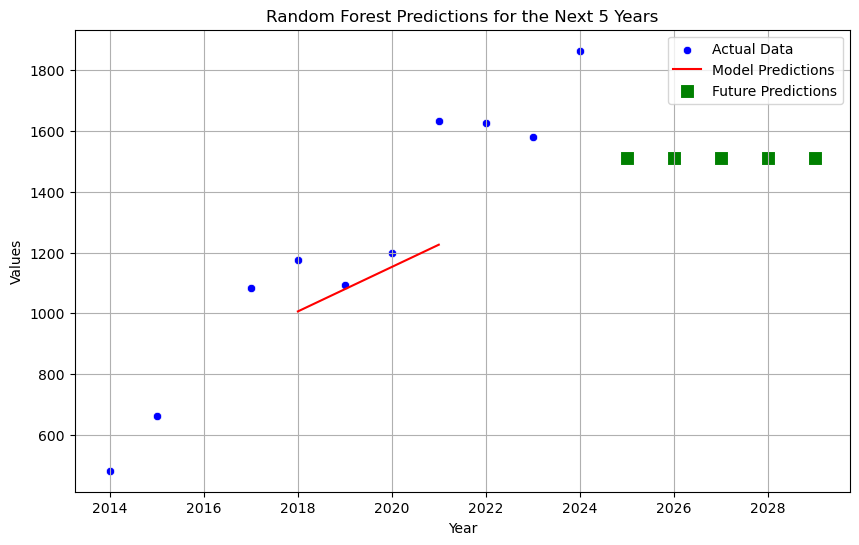

In [54]:

# Defining Features (X) and Target (y)
X = df_filtered[['Year']]   # Features
y = df_filtered['values']   # Target variable

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
# Train the Random Forest Model with Regularization
model = RandomForestRegressor(
    n_estimators=100,       # Number of trees
    max_depth=3,            # Limit tree depth to prevent overfitting
    min_samples_split=5,     # Minimum samples needed to split a node
    min_samples_leaf=2,      # Minimum samples needed in a leaf
    random_state=42
)


model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
accuracy = model.score(X_test, y_test)  # Accuracy is essentially R² for regressors

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

# Forecasting for the Next 5 Years (2025-2029)
future_years = pd.DataFrame({'Year': range(2025, 2030)})
future_predictions = model.predict(future_years)

# Add predictions to dataframe
future_years['Predicted Values'] = future_predictions
print(future_years)

# Visualization
plt.figure(figsize=(10, 6))

# Actual Data
sns.scatterplot(x=df_filtered['Year'], y=df_filtered['values'], label="Actual Data", color='blue')

# Model Predictions
sns.lineplot(x=X_test['Year'], y=y_pred, label="Model Predictions", color='red')

# Future Predictions
sns.scatterplot(x=future_years['Year'], y=future_years['Predicted Values'], label="Future Predictions", color='green', marker='s', s=100)

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Random Forest Predictions for the Next 5 Years")
plt.legend()
plt.grid()
plt.show()

# Now trying XGboost


XGBoost R²: 0.9999999980040452
R² Score: 1.0000
MSE: 0.0004
Model Accuracy: 0.9874
   Year  Predicted Values
0  2025            1864.0
1  2026            1864.0
2  2027            1864.0
3  2028            1864.0
4  2029            1864.0


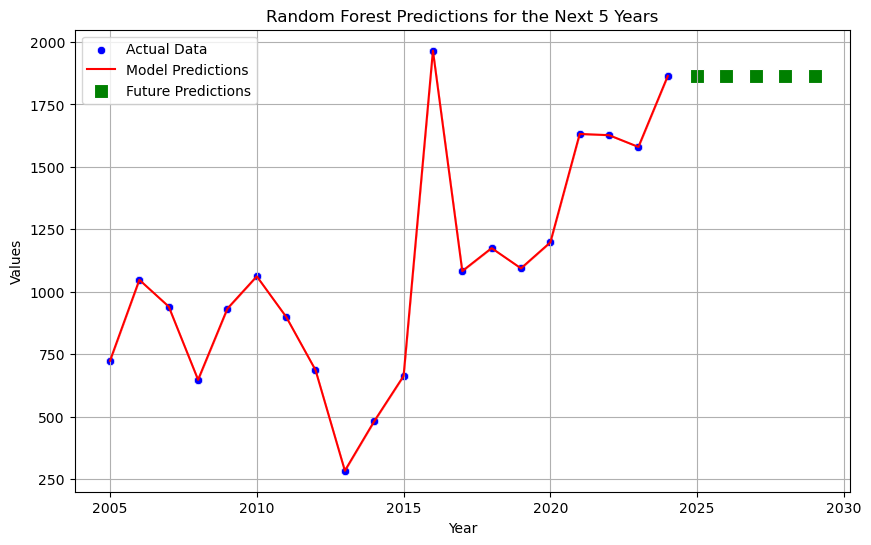

In [19]:
# XGBoost Model (Alternative)
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))

model.fit(X_train, y_train)


# Model Evaluation
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
accuracy = model.score(X_test, y_test)  # Accuracy is essentially R² for regressors

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

# Forecasting for the Next 5 Years (2025-2029)
future_years = pd.DataFrame({'Year': range(2025, 2030)})
future_predictions = model.predict(future_years)

# Add predictions to dataframe
future_years['Predicted Values'] = future_predictions
print(future_years)

# Visualization
plt.figure(figsize=(10, 6))

# Actual Data
sns.scatterplot(x=df_filtered['Year'], y=df_filtered['values'], label="Actual Data", color='blue')

# Model Predictions
sns.lineplot(x=X_test['Year'], y=y_pred_xgb, label="Model Predictions", color='red')

# Future Predictions
sns.scatterplot(x=future_years['Year'], y=future_years['Predicted Values'], label="Future Predictions", color='green', marker='s', s=100)

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Random Forest Predictions for the Next 5 Years")
plt.legend()
plt.grid()
plt.show()

# Now isolating the dataset to the years between 2014 and 2024, while droping the outlier year of 2016. Then running random forrest and xgboost

In [20]:
# Filtering dataset for years 2014-2024 and removing 2016
df_filtered = df3[(df3['Year'] >= 2014) & (df3['Year'] <= 2024) & (df3['Year'] != 2016)]

# Creating 'values' column as the count per year
df_filtered['values'] = df_filtered.groupby('Year')['Year'].transform('count')

# Dropping duplicates since transform() creates duplicate rows
df_filtered = df_filtered.drop_duplicates(subset=['Year'])

/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_92387/2624987286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['values'] = df_filtered.groupby('Year')['Year'].transform('count')


In [21]:
#-- Spliting the x and y variables in train_test_split() which will output a tuple of 4 varaibles for testing --#

X = df_filtered[['Year']]  #-- Features --#
y = df_filtered['values']        #-- Target --#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

R² Score: -0.8537
MSE: 96787.6377
Model Accuracy: -0.8537
   Year  Predicted Values
0  2025       1511.735583
1  2026       1511.735583
2  2027       1511.735583
3  2028       1511.735583
4  2029       1511.735583


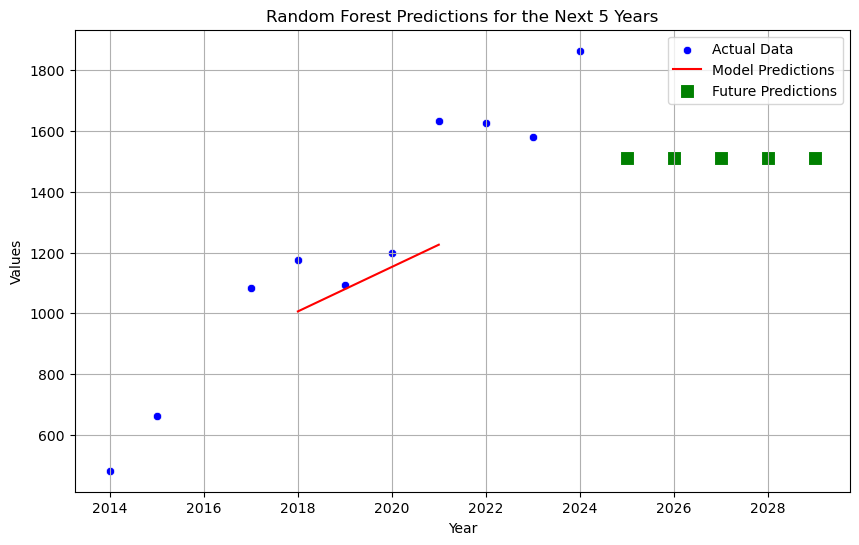

In [22]:
# Defining Features (X) and Target (y)
X = df_filtered[['Year']]   # Features
y = df_filtered['values']   # Target variable

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
# Train the Random Forest Model with Regularization
model = RandomForestRegressor(
    n_estimators=100,       # Number of trees
    max_depth=5,            # Limit tree depth to prevent overfitting
    min_samples_split=5,     # Minimum samples needed to split a node
    min_samples_leaf=2,      # Minimum samples needed in a leaf
    random_state=42
)


model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
accuracy = model.score(X_test, y_test)  # Accuracy is essentially R² for regressors

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

# Forecasting for the Next 5 Years (2025-2029)
future_years = pd.DataFrame({'Year': range(2025, 2030)})
future_predictions = model.predict(future_years)

# Add predictions to dataframe
future_years['Predicted Values'] = future_predictions
print(future_years)

# Visualization
plt.figure(figsize=(10, 6))

# Actual Data
sns.scatterplot(x=df_filtered['Year'], y=df_filtered['values'], label="Actual Data", color='blue')

# Model Predictions
sns.lineplot(x=X_test['Year'], y=y_pred, label="Model Predictions", color='red')

# Future Predictions
sns.scatterplot(x=future_years['Year'], y=future_years['Predicted Values'], label="Future Predictions", color='green', marker='s', s=100)

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Random Forest Predictions for the Next 5 Years")
plt.legend()
plt.grid()
plt.show()

XGBoost R²: -0.8843695248657482
R² Score: -0.8844
MSE: 98387.1727
Model Accuracy: -0.8537
   Year  Predicted Values
0  2025       1511.735583
1  2026       1511.735583
2  2027       1511.735583
3  2028       1511.735583
4  2029       1511.735583


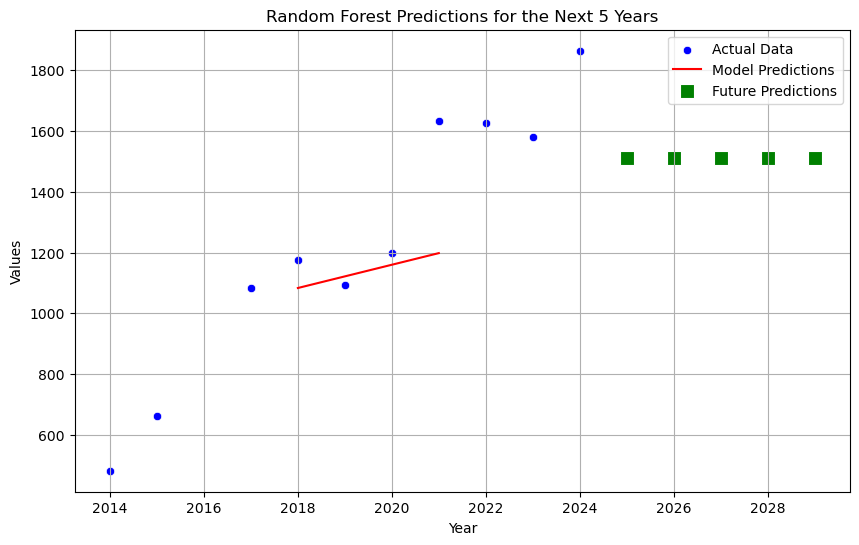

In [23]:
# XGBoost Model (Alternative)
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))

model.fit(X_train, y_train)


# Model Evaluation
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
accuracy = model.score(X_test, y_test)  # Accuracy is essentially R² for regressors

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

# Forecasting for the Next 5 Years (2025-2029)
future_years = pd.DataFrame({'Year': range(2025, 2030)})
future_predictions = model.predict(future_years)

# Add predictions to dataframe
future_years['Predicted Values'] = future_predictions
print(future_years)

# Visualization
plt.figure(figsize=(10, 6))

# Actual Data
sns.scatterplot(x=df_filtered['Year'], y=df_filtered['values'], label="Actual Data", color='blue')

# Model Predictions
sns.lineplot(x=X_test['Year'], y=y_pred_xgb, label="Model Predictions", color='red')

# Future Predictions
sns.scatterplot(x=future_years['Year'], y=future_years['Predicted Values'], label="Future Predictions", color='green', marker='s', s=100)

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Random Forest Predictions for the Next 5 Years")
plt.legend()
plt.grid()
plt.show()

# Now trying a different approach

In [24]:
# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

future_years = pd.DataFrame({'Year': range(2025, 2030)})
# Predict future values
future_predictions_xgb = xgb_model.predict(future_years)

# Evaluate Model
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost R² Score: {r2_xgb:.4f}")
print(f"XGBoost MSE: {mse_xgb:.4f}")

# Add predictions to DataFrame
future_years['Predicted Values (XGBoost)'] = future_predictions_xgb
print(future_years)

XGBoost R² Score: -0.8843
XGBoost MSE: 98384.7912
   Year  Predicted Values (XGBoost)
0  2025                 1859.939941
1  2026                 1859.939941
2  2027                 1859.939941
3  2028                 1859.939941
4  2029                 1859.939941


In [25]:
import statsmodels.api as sm

# Fit LOESS Model (Using 60% of data points for smoothing)
lowess_results = sm.nonparametric.lowess(df_filtered['values'], df_filtered['Year'], frac=0.6)

# Convert to DataFrame for visualization
loess_df = pd.DataFrame(lowess_results, columns=['Year', 'Smoothed Values'])


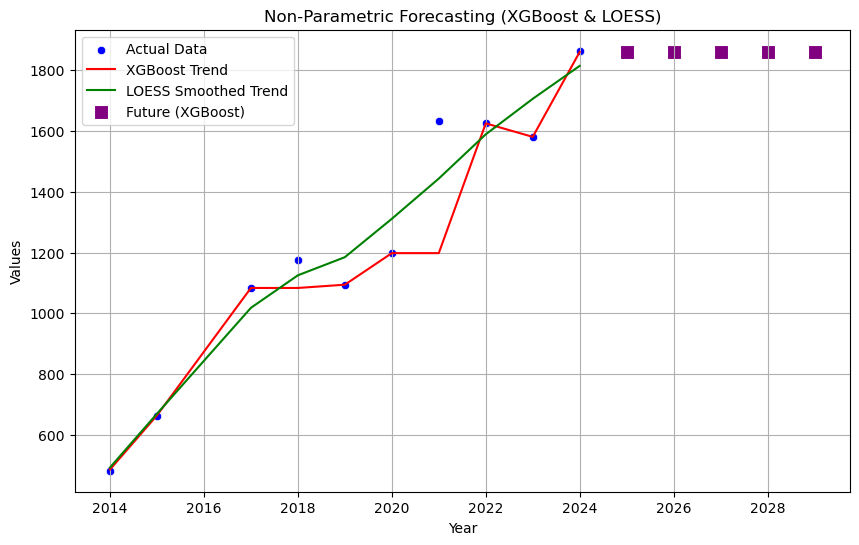

In [26]:
plt.figure(figsize=(10, 6))

# Actual Data
sns.scatterplot(x=df_filtered['Year'], y=df_filtered['values'], label="Actual Data", color='blue')

# XGBoost Predictions
sns.lineplot(x=df_filtered['Year'], y=xgb_model.predict(X), label="XGBoost Trend", color='red')

# LOESS Smoothed Trend
sns.lineplot(x=loess_df['Year'], y=loess_df['Smoothed Values'], label="LOESS Smoothed Trend", color='green')

# Future XGBoost Predictions
sns.scatterplot(x=future_years['Year'], y=future_years['Predicted Values (XGBoost)'], label="Future (XGBoost)", color='purple', marker='s', s=100)

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Non-Parametric Forecasting (XGBoost & LOESS)")
plt.legend()
plt.grid()
plt.show()


# Now extracting value counts


In [27]:
df_filtered = df3[(df3['Year'].between(2014, 2024)) & (df3['Year'] != 2016)]

# Count occurrences per year
df_filtered['values'] = df_filtered.groupby('Year')['Year'].transform('count')

# Keep only unique Year-Values pairs and reset index
df_filtered = df_filtered[['Year', 'values']].drop_duplicates().reset_index(drop=True)

print(df_filtered)

   Year  values
0  2019    1094
1  2021    1632
2  2024    1864
3  2022    1627
4  2023    1580
5  2015     663
6  2017    1083
7  2020    1198
8  2018    1175
9  2014     482


/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_92387/3685248902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['values'] = df_filtered.groupby('Year')['Year'].transform('count')


# Now running timeseries models to get predictions

In [28]:
# Perform the ADF test on the values
adf_test = adfuller(df_filtered['values'])

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] > 0.05:
    print("Data has a trend (not stationary). Differencing may be needed.")
else:
    print("Data is stationary, suitable for time series forecasting.")


ADF Statistic: -1.2680590336370559
p-value: 0.6436557567742309
Data has a trend (not stationary). Differencing may be needed.


# Now running the order of first differencing

In [29]:
# First differencing to make data stationary
df_filtered['diff_values'] = df_filtered['values'].diff().dropna()

# Check the ADF again on the differenced data
adf_test_diff = adfuller(df_filtered['diff_values'].dropna())
print(f"ADF Statistic (Differenced Data): {adf_test_diff[0]}")
print(f"p-value (Differenced Data): {adf_test_diff[1]}")


ADF Statistic (Differenced Data): -2.769196145567137
p-value (Differenced Data): 0.06281037940128514


In [30]:
# Log transformation followed by first differencing
df_filtered['log_values'] = np.log(df_filtered['values'] + 1)
df_filtered['log_diff_values'] = df_filtered['log_values'].diff().dropna()

# Second differencing after log transformation
df_filtered['log_diff2_values'] = df_filtered['log_diff_values'].diff().dropna()

# Check the ADF test on log-differenced data
adf_result = adfuller(df_filtered['log_diff2_values'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")




ADF Statistic: -3.7624998279777593
p-value: 0.0033151567152085288


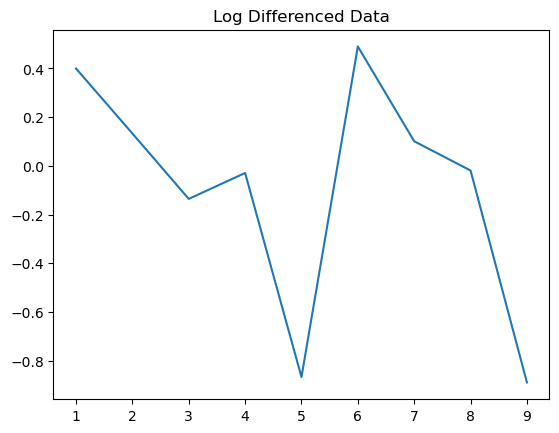

In [31]:
# Ensure there are no infinite values in the data
df_filtered = df_filtered[~df_filtered['log_diff_values'].isin([np.inf, -np.inf])]
# Plot the differenced data to inspect
plt.plot(df_filtered['log_diff_values'])
plt.title("Log Differenced Data")
plt.show()

Now running autoARIMA for the p,d,q's for the order of first differencing.

In [36]:
df_filtered = df_filtered.dropna(subset=['log_diff_values'])



In [37]:
print(np.isinf(df_filtered['log_diff_values']).sum())

0


In [38]:
print(df_filtered['log_diff_values'].describe())


count    9.000000
mean    -0.090944
std      0.489579
min     -0.889857
25%     -0.135909
50%     -0.019369
75%      0.132842
max      0.490131
Name: log_diff_values, dtype: float64


In [40]:
auto_model = pm.auto_arima(df_filtered['log_diff_values'],
                           seasonal=True,
                           stepwise=True,
                           trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15.625, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17.191, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13.968, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.221 seconds


/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


# Now running SARIMAX

In [41]:
# Use the optimal parameters from AutoARIMA
model = SARIMAX(df_filtered['log_diff_values'],
                order=auto_model.order,        # Automatically selected p, d, q
                seasonal_order=(0, 0, 0, 0),  # Example seasonal order
                enforce_stationarity=False,  
                enforce_invertibility=False)

sarimax_result = model.fit()

# Forecast the next 5 years
future_years = [2025, 2026, 2027, 2028, 2029]
forecast = sarimax_result.forecast(steps=5)

# Create DataFrame for Predictions
future_df = pd.DataFrame({'Year': future_years, 'Predicted Values': forecast})
print(future_df)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.06465D-01    |proj g|=  6.56856D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      5      1     0     0   5.135D-06   6.062D-01
  F =  0.60620192721309274     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
    Year  Predicted Values
9   2025               0.0
10  2026               0.0
11  2027               0.0
12  2028               0.0
13  2029               0.0


/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
# Forecast the next 5 years (on differenced and log-transformed data)
forecast_log_diff = sarimax_result.forecast(steps=5)

# Inverse the log transformation (exp() reverses log)
forecast_diff = np.exp(forecast_log_diff) - 1  # Subtract 1 to reverse log(1)

# Reverse differencing (add back the last value from the original data)
forecast_original = forecast_diff + df_filtered['values'].iloc[-1]

# Prepare the results for display
future_years = [2025, 2026, 2027, 2028, 2029]
future_df = pd.DataFrame({'Year': future_years, 'Predicted Values': forecast_original})
print(future_df)


    Year  Predicted Values
9   2025             482.0
10  2026             482.0
11  2027             482.0
12  2028             482.0
13  2029             482.0


/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Now attempting to predict with Linear Regression for the last 10 years minus 2016

In [43]:
# Filtering dataset for years 2014-2024 and removing 2016
df_filtered = df3[(df3['Year'] >= 2014) & (df3['Year'] <= 2024) & (df3['Year'] != 2016)]

# Creating 'values' column as the count per year
df_filtered['values'] = df_filtered.groupby('Year')['Year'].transform('count')

# Dropping duplicates since transform() creates duplicate rows
df_filtered = df_filtered.drop_duplicates(subset=['Year'])

/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_92387/2624987286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['values'] = df_filtered.groupby('Year')['Year'].transform('count')


In [44]:
#-- Spliting the x and y variables in train_test_split() which will output a tuple of 4 varaibles for testing --#

X = df_filtered[['Year']]  #-- Features --#
y = df_filtered['values']        #-- Target --#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Predict for the next 5 years (2025-2030)
future_years = pd.DataFrame({'Year': np.arange(2025, 2031)})
future_predictions = model.predict(future_years)

# Display future predictions
predictions_df = pd.DataFrame({'Year': future_years['Year'], 'Predicted_Values': future_predictions})
print(predictions_df)

Mean Squared Error: 31404.0642
R² Score: 0.3985
   Year  Predicted_Values
0  2025       1927.002618
1  2026       2053.633508
2  2027       2180.264398
3  2028       2306.895288
4  2029       2433.526178
5  2030       2560.157068


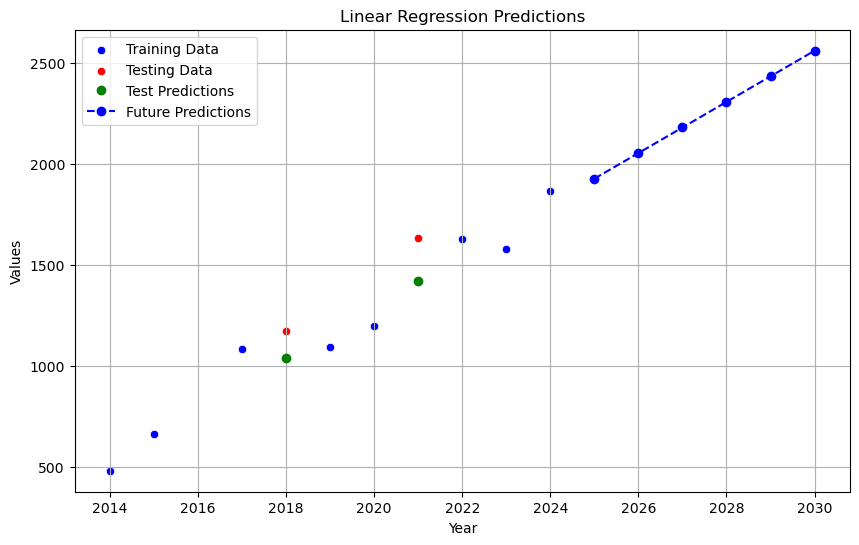

In [47]:
# Plot historical data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['Year'], y=y_train, color='blue', label='Training Data')
sns.scatterplot(x=X_test['Year'], y=y_test, color='red', label='Testing Data')

# Plot model predictions for test set
plt.plot(X_test['Year'], y_pred, 'go', label='Test Predictions')

# Plot future predictions
plt.plot(future_years['Year'], future_predictions, 'bo--', label='Future Predictions')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Linear Regression Predictions")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
df4 = pd.read_csv()